#**Import required libraries**

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import os
import json
import PIL
import PIL.Image
import pathlib
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import glob
import argparse
import xml.etree.ElementTree as ET
from tqdm import tqdm
import random, shutil
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
# Setting a seed for reproducibility
np.random.seed(123)

# **Load data**

To get the data, you need to create a shortcut between your Drive account and the Drive folder where the original data is stored.

I used these links: 

https://drive.google.com/file/d/1G917wmn6XKVEKQZHbH-j3-PQJx36Jc-c/view

https://drive.google.com/drive/folders/1svFSy2Da3cVMvekBwe13mzyx38XZ9xWo

In [ ]:
 # Extract tar files from IP102 dataset (contains barley and wheat pests)
%cd /content
!tar xvf /content/drive/MyDrive/VOC2007/Annotations.tar
!tar xvf /content/drive/MyDrive/VOC2007/JPEGImages.tar

(Classes in dataset IP102 range from 0 to 102, so images need to be check to see if they truly correspond to their classes).

In [ ]:
 # Extract tar.gz files from AgriPest dataset (contains corn and rice pests)
!tar xzvf /content/drive/MyDrive/AgriPest.tar.gz00  

# **Basic exploratory data analysis**

##**Pests for Barley** 

**Pest for Barley =** wireworms, armyworms, aphids 

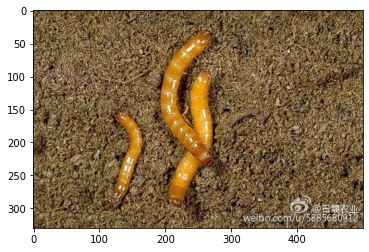

In [ ]:
# Check one example for wireworm
img = mpimg.imread('/content/JPEGImages/IP016000014.jpg')
imgplot = plt.imshow(img)
plt.show()

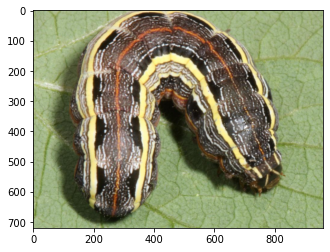

In [ ]:
# Check one example for armyworm
img = mpimg.imread('/content/JPEGImages/IP023000094.jpg')
imgplot = plt.imshow(img)
plt.show()

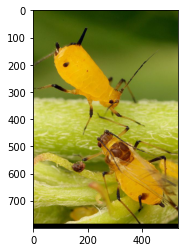

In [ ]:
# Check one example for aphids
img = mpimg.imread('/content/JPEGImages/IP024000315.jpg')
imgplot = plt.imshow(img)
plt.show()

##**Pests for Wheat** 

**Pest for Wheat =** greenbug, bird cherry-oataphid, wheat blossom midge, wheat phloeothrips, wheat sawfly

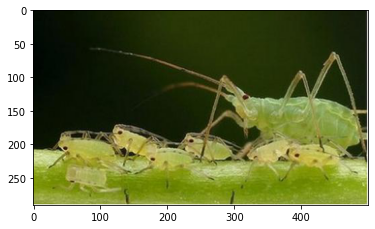

In [ ]:
# Check one example for greenbug
img = mpimg.imread('/content/JPEGImages/IP028000010.jpg')
imgplot = plt.imshow(img)
plt.show()

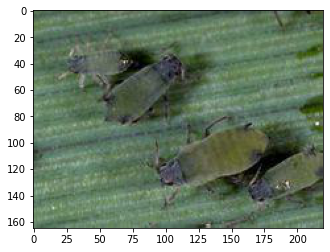

In [ ]:
# Check one example for bird cherry-oataphid
img = mpimg.imread('/content/JPEGImages/IP029000005.jpg')
imgplot = plt.imshow(img)
plt.show()

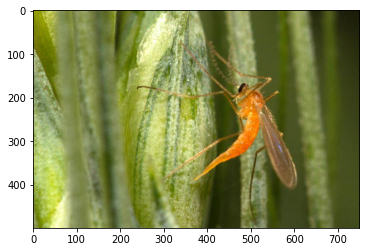

In [ ]:
# Check one example for wheat blossom midge
img = mpimg.imread('/content/JPEGImages/IP030000250.jpg')
imgplot = plt.imshow(img)
plt.show()

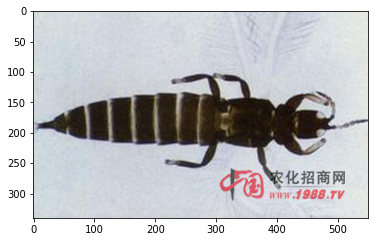

In [ ]:
# Check one example for wheat phloeothrips
img = mpimg.imread('/content/JPEGImages/IP034000031.jpg')
imgplot = plt.imshow(img)
plt.show()

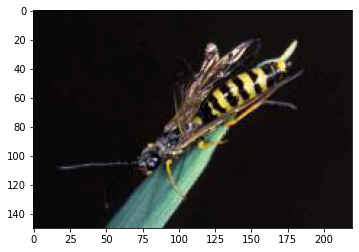

In [ ]:
# Check one example for wheat sawfly
img = mpimg.imread('/content/JPEGImages/IP035000072.jpg')
imgplot = plt.imshow(img)
plt.show()

##**Pests for Corn** 

**Pest for Corn =** RM: Rhopalosiphum maidis, DP: Dichocrocis punctiferalis, GM: Guenee Mythimnaseparata walker

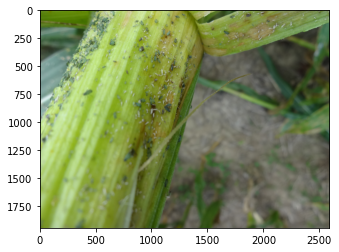

In [ ]:
# Check one example for  RM: Rhopalosiphum maidis   
img = mpimg.imread('/content/AgriPest/corn/JPEGImages/14111_00000004.jpg')
imgplot = plt.imshow(img)
plt.show()

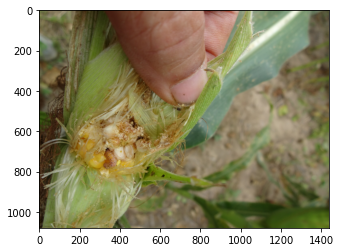

In [ ]:
# Check one example for  DP: Dichocrocis punctiferalis
img = mpimg.imread('/content/AgriPest/corn/JPEGImages/14131_00000600.jpg')
imgplot = plt.imshow(img)
plt.show()

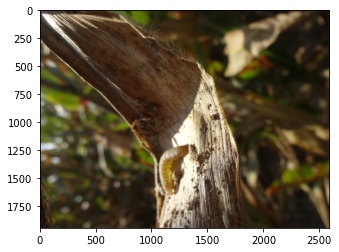

In [ ]:
# Check one example for GM: Guenee Mythimnaseparata walker
img = mpimg.imread('/content/AgriPest/corn/JPEGImages/14141_00002443.jpg')
imgplot = plt.imshow(img)
plt.show()

##**Pests for Rice**

Rice leaf roller, rice leaf caterpillar, yellow rice borer, rice gall midge, rice water weevil.					


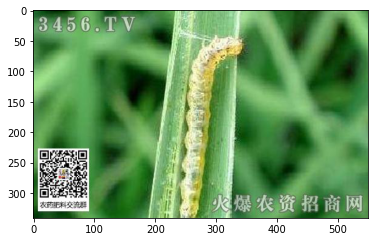

In [ ]:
# Check one example for rice leaf caterpillar
img = mpimg.imread('/content/JPEGImages/IP001000223.jpg')
imgplot = plt.imshow(img)
plt.show()

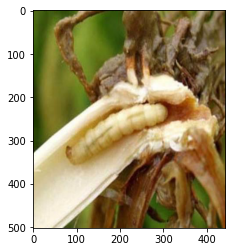

In [ ]:
# Check one example for yellow rice borer
img = mpimg.imread('/content/JPEGImages/IP004000168.jpg')
imgplot = plt.imshow(img)
plt.show()

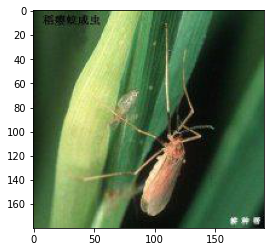

In [ ]:
# Check one example for rice gall midge 
img = mpimg.imread('/content/JPEGImages/IP005000155.jpg')
imgplot = plt.imshow(img)
plt.show()

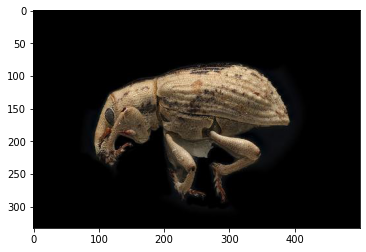

In [ ]:
# Check one example for rice water weevil
img = mpimg.imread('/content/JPEGImages/IP010000120.jpg')
imgplot = plt.imshow(img)
plt.show()

##### Now I will create a `labelmap.pbtxt` file, to specify the classes and save them:

In [ ]:
%cd /content

/content


In [ ]:
%%writefile labelmap.pbtxt

item {
  name: "14111"
  id: 1
  display_name:'Rhopalosiphum maidis (Corn)'

  name: "14131"
  id: 2
  display_name:'Dichocrocis punctiferalis (Corn)'

  name: "14141"
  id: 3
  display_name:'Guenee Mythimnaseparata walker (Corn)'

  name: "16"
  id: 4
  display_name:'wireworms (Barley)'

  name: "23"
  id: 5
  display_name:'armyworms (Barley)'

  name: "24"
  id: 6
  display_name:'aphids (Barley)'

  name: "28"
  id: 7
  display_name:'greenbug (Wheat)'

  name: "29"
  id: 8
  display_name:'bird cherry-oataphid (Wheat)'

  name: "30"
  id: 9
  display_name:'wheat blossom midge (Wheat)'

  name: "34"
  id: 10
  display_name:'wheat phloeothrips (Wheat)'

  name: "35"
  id: 11
  display_name:'wheat sawfly (Wheat)'

  name: "1"
  id: 12
  display_name:'rice leaf caterpillar'

  name: "4"
  id: 13
  display_name:'yellow rice borer'

  name: "5"
  id: 14
  display_name:'rice gall midge'

  name: "10"
  id: 15
  display_name:'rice water weevil'
 

}

Writing labelmap.pbtxt


# Create full dataset 

I will create directories for each pest and reorganize data in there.

In [ ]:
# Create directories for each pest
%%bash
cd /content
mkdir -p pests/{1,4,5,10,16,23,24,28,29,30,34,35,14111,14131,14141}

In [ ]:
# Use this instead if you also need separate images and labels

#!mkdir -p pests/{1/{images,labels},4/{images,labels},5/{images,labels},10/{images,labels},16/{images,labels},23/{images,labels},24/{images,labels},28/{images,labels},29/{images,labels},30/{images,labels},34/{images,labels},35/{images,labels},14111/{images,labels},14131/{images,labels},14141/{images,labels}}

In [ ]:
# Don't forget to add the path for labels and images when moving

#mv /content/Annotations/IP016* /content/pests/16/labels
#mv /content/JPEGImages/IP016* /content/pests/16/images

In [ ]:
# Move each pest to their respective directory

# Barley
mv /content/Annotations/IP016* /content/pests/16   
mv /content/Annotations/IP023* /content/pests/23  
mv /content/Annotations/IP024* /content/pests/24

mv /content/JPEGImages/IP016* /content/pests/16
mv /content/JPEGImages/IP023* /content/pests/23 
mv /content/JPEGImages/IP024* /content/pests/24

# Wheat
mv /content/Annotations/IP028* /content/pests/28
mv /content/Annotations/IP029* /content/pests/29
mv /content/Annotations/IP030* /content/pests/30
mv /content/Annotations/IP034* /content/pests/34
mv /content/Annotations/IP035* /content/pests/35

mv /content/JPEGImages/IP028* /content/pests/28
mv /content/JPEGImages/IP029* /content/pests/29
mv /content/JPEGImages/IP030* /content/pests/30
mv /content/JPEGImages/IP034* /content/pests/34
mv /content/JPEGImages/IP035* /content/pests/35

# Corn
mv /content/AgriPest/corn/Annotations/14111* /content/pests/14111
mv /content/AgriPest/corn/Annotations/14131* /content/pests/14131
mv /content/AgriPest/corn/Annotations/14141* /content/pests/14141

mv /content/AgriPest/corn/JPEGImages/14111* /content/pests/14111
mv /content/AgriPest/corn/JPEGImages/14131* /content/pests/14131
mv /content/AgriPest/corn/JPEGImages/14141* /content/pests/14141

# Rice
mv /content/Annotations/IP001* /content/pests/1
mv /content/Annotations/IP004* /content/pests/4
mv /content/Annotations/IP005* /content/pests/5
mv /content/Annotations/IP010* /content/pests/10

mv /content/JPEGImages/IP001* /content/pests/1
mv /content/JPEGImages/IP004* /content/pests/4
mv /content/JPEGImages/IP005* /content/pests/5
mv /content/JPEGImages/IP010* /content/pests/10

Since the image IP034000029 doesn't have a XML file associated with its annotations, I will remove it from the directory.

In [ ]:
# Removing problematic image
!rm /content/pests/34/IP034000029.jpg

# Create small dataset

I will take some images of each directory to create training and test datasets, with a limit of ~100 images per pest, and with a proportion ~10% for test dataset.

In [ ]:
# Count number of files present in each directory

%%bash
ls /content/pests/1 | wc -l   
ls /content/pests/4 | wc -l 
ls /content/pests/5 | wc -l    
ls /content/pests/10 | wc -l    
ls /content/pests/16 | wc -l  
ls /content/pests/23 | wc -l   
ls /content/pests/24 | wc -l 
ls /content/pests/28 | wc -l    
ls /content/pests/29 | wc -l  
ls /content/pests/30 | wc -l    
ls /content/pests/34 | wc -l 
ls /content/pests/35 | wc -l 
ls /content/pests/14111 | wc -l 
ls /content/pests/14131 | wc -l 
ls /content/pests/14141 | wc -l 

348
228
162
186
310
850
412
1758
54
134
48
182
276
450
1198
3444


In [ ]:
# Create training and test directories
%%bash
cd /content
mkdir -p dataset/{training,test}

In [ ]:
# Create small datasets
%%bash

cd /content/pests/1 
mv `ls | head -180` /content/dataset/training
mv `ls | head -20`  /content/dataset/test

cd /content/pests/4
mv `ls | head -144` /content/dataset/training
mv `ls | head -16`  /content/dataset/test

cd /content/pests/5 
mv `ls | head -162` /content/dataset/training
mv `ls | head -18`  /content/dataset/test

cd /content/pests/10 
mv `ls | head -180` /content/dataset/training
mv `ls | head -20`  /content/dataset/test

cd /content/pests/16 
mv `ls | head -180` /content/dataset/training
mv `ls | head -20`  /content/dataset/test

cd /content/pests/23 
mv `ls | head -180` /content/dataset/training
mv `ls | head -20`  /content/dataset/test

cd /content/pests/24 
mv `ls | head -180` /content/dataset/training
mv `ls | head -20`  /content/dataset/test

cd /content/pests/28 
mv `ls | head -44` /content/dataset/training
mv `ls | head -6`  /content/dataset/test

cd /content/pests/29 
mv `ls | head -120` /content/dataset/training
mv `ls | head -10`  /content/dataset/test

cd /content/pests/30 
mv `ls | head -42` /content/dataset/training
mv `ls | head -6`  /content/dataset/test

cd /content/pests/34 
mv `ls | head -162` /content/dataset/training
mv `ls | head -18`  /content/dataset/test

cd /content/pests/35 
mv `ls | head -180` /content/dataset/training
mv `ls | head -20`  /content/dataset/test


cd /content/pests/14111 
mv `ls | head -180` /content/dataset/training
mv `ls | head -20`  /content/dataset/test


cd /content/pests/14131 
mv `ls | head -180` /content/dataset/training
mv `ls | head -20`  /content/dataset/test

cd /content/pests/14141 
mv `ls | head -180` /content/dataset/training
mv `ls | head -20`  /content/dataset/test

In [ ]:
# Number of files in datasets
!ls /content/dataset/training | wc -l 
!ls /content/dataset/test | wc -l 

2474
274


In [ ]:
#Download datasets
!cd /content
!tar -czvf train.tar.gz  /content/dataset/training
!tar -czvf test.tar.gz   /content/dataset/test

tar: Removing leading `/' from member names
/content/dataset/training/
/content/dataset/training/IP024000501.jpg
/content/dataset/training/IP010000363.xml
/content/dataset/training/IP024000443.jpg
/content/dataset/training/IP001000344.xml
/content/dataset/training/IP030000132.jpg
/content/dataset/training/IP004000335.jpg
/content/dataset/training/IP023000488.xml
/content/dataset/training/IP000000309.jpg
/content/dataset/training/IP001000049.jpg
/content/dataset/training/IP001000325.xml
/content/dataset/training/IP029000172.jpg
/content/dataset/training/IP001000275.jpg
/content/dataset/training/IP004000049.jpg
/content/dataset/training/IP034000063.jpg
/content/dataset/training/IP024000259.jpg
/content/dataset/training/IP034000033.jpg
/content/dataset/training/IP000000321.xml
/content/dataset/training/IP016000170.jpg
/content/dataset/training/IP023000103.xml
/content/dataset/training/14131_00000021.jpg
/content/dataset/training/IP004000426.jpg
/content/dataset/training/IP004000106.jpg
/c